<a href="https://colab.research.google.com/github/ttevhide/Women_In_Tech/blob/main/HESA_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovery project - page views

### Adapted from freeCodeCamp [project](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

For this project you will visualise data that has values recorded against time.  You will use Pandas and Matplotlib to visualise the dataset which contains the number of page views each day on the freeCodeCamp.org forum between 2016-05-09 and 2019-12-03. You will create a line chart, a bar chart, and some box plots to create visualisations that will help you understand the patterns in visits to the forum and identify growth over various time ranges (yearly, monthly, etc).


The dataset can be read from here: "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"

Visualise and analyse the data in the following ways:



In [ ]:
import pandas as pd
url= "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
df=pd.read_csv(url)
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


None

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


### 1.  a line plot, similar to this 
---
![example](https://drive.google.com/uc?id=1Cic5SybYEc86rqbwTCZzyEf4rzQNWJLP) (taken from the freeCodeCamp site) and with similar labelling.

To prepare the data for the line plot you might do the following:  

*  convert the `date` column to **datetime** type 
*  create 3 new columns for `year`, `month` and `day` (use `dt.year, dt.strftime to get the month name, dt.day`)
*  set the index to the **date** column.
*  clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.strftime('%B')
df['year'] = df['date'].dt.year

df.index = df['date']

top = df['value'].quantile(0.975)
bottom = df['value'].quantile(0.025)

df2=df[(df['value'] > bottom) & (df['value'] < top)] 
df2

,date,value,day,month,month_name,year
date,,,,,,
2016-05-19,2016-05-19,19736,19,5,May,2016
2016-05-26,2016-05-26,18060,26,5,May,2016
2016-05-27,2016-05-27,19997,27,5,May,2016
2016-05-28,2016-05-28,19044,28,5,May,2016
2016-05-29,2016-05-29,20325,29,5,May,2016
...,...,...,...,...,...,...
2019-11-24,2019-11-24,138875,24,11,November,2019
2019-11-29,2019-11-29,171584,29,11,November,2019
2019-11-30,2019-11-30,141161,30,11,November,2019


,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


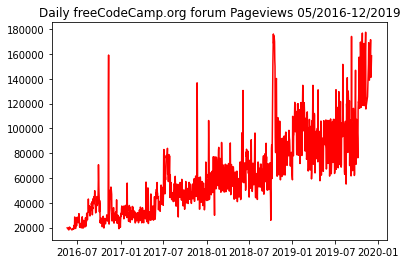

In [ ]:
import matplotlib.pyplot as plt

df3 = df2[['value']]  
display(df3.head())

plt.plot(df3['value'],color='red')
plt.title('Daily freeCodeCamp.org forum Pageviews 05/2016-12/2019')
plt.show()



###2. a bar chart similar to this 
---

![example](https://drive.google.com/uc?id=15-tIwheaCIcUsx6jfg5DBAWFVGE4bHzK) (taken from the freeCodeCamp site) and with similar labelling.  It should show average daily page views for each month grouped by year. 

To prepare the data for the bar chart you should create a pivot table and can use pivot_table_name.plot(kind='bar')


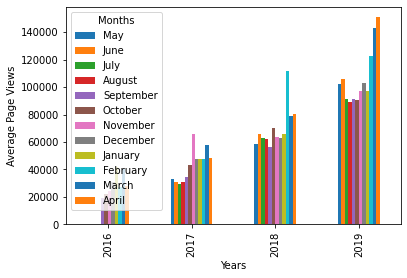

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df_pivot = pd.pivot_table(df2, values='value', index='year', columns=['month'], aggfunc = np.mean)

df_pivot.plot(kind='bar')
plt.legend(labels=df2['month_name'].unique(), title='Months')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.show()




###3.  a set of box plots similar to this
---
 ![example](https://drive.google.com/uc?id=1kqhGKnA0Ybtyw2cew67u3_ogMS9Fb1hM)

These box plots should show how the values are distributed within a given year or month and how it compares over time. 


###4.  predict the number of page views in the year 2020 based on the data up to 2019
---

*  perform a linear regression and create a line of best fit 
*  predict the page views in the year 2020, 2025 and 2030 if identified trends persist. 


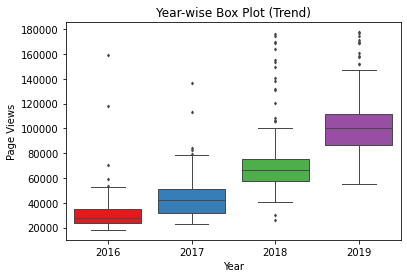

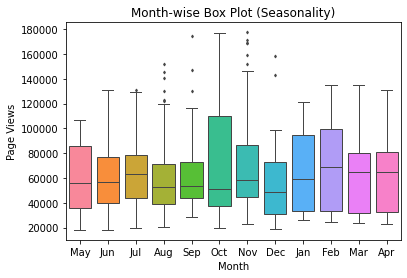

In [ ]:
import seaborn as sns

chart1 = sns.boxplot(data=df2, x='year', y='value', palette=sns.color_palette("Set1"),linewidth=1, fliersize=2, saturation=6)
chart1.set_ylabel('Page Views')
chart1.set_xlabel('Year')
chart1.set_title('Year-wise Box Plot (Trend)')
plt.show()

chart2 = sns.boxplot(data=df2, x=[m[:3] for m in df2['month_name']],y='value', linewidth=1, fliersize=2, saturation=6)
chart2.set_ylabel('Page Views')
chart2.set_xlabel('Month')
chart2.set_title('Month-wise Box Plot (Seasonality)')
plt.show()

# Reflect

What caused the biggest problems?
How did you solve these problems?
Syntax, not knowing how to visualise required information. Google helps a lot.
